In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import matplotlib.mlab as mlab
from scipy.optimize import curve_fit
from astropy import units as u
import math
%matplotlib inline
plt.rcParams['agg.path.chunksize'] = 10000

In [16]:
def plot_hist(array,bin_num):
    n, bins, patches = plt.hist(array,bins=bin_num)
    plt.close()
    return bins, n

In [104]:
def make_graphs(file_str, nbins, title_str = None, save_str = 'images/null', x_lim = None, w = 20, h =10, colour='k'):
    array = np.load(file_str)
    print(array.shape)
    # create histogram and convert from arcminutes to arcseconds
    bins, n = plot_hist([row[1]*60. for row in array],nbins)
      
   
    step = 0.5*(bins[1]-bins[0])
    
    fig = plt.figure(figsize=(w,h))
    plt.plot(bins[:-1]+step, n, colour)
    plt.xlabel('Distance (arcseconds)', fontsize ='12' )
    plt.ylabel('Frequency', fontsize ='12')
    if title_str != None:
        plt.title(title_str)
    plt.xlim(0,x_lim)
    plt.savefig(save_str)
    
    return bins[:-1]+step, n

(590093, 7)


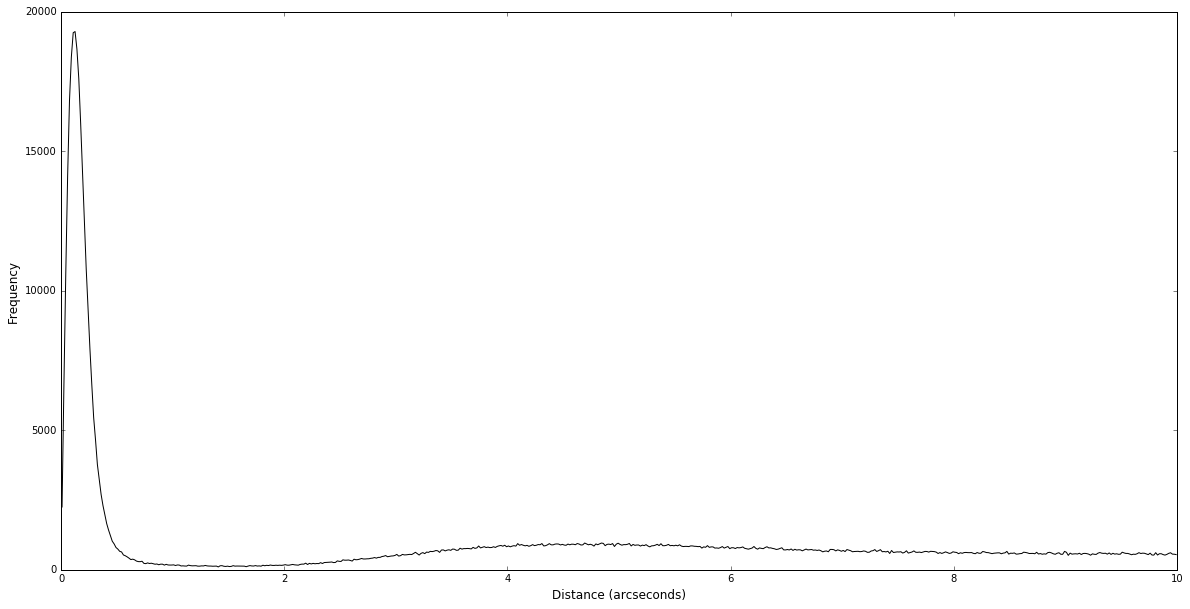

In [110]:
all_sdss = make_graphs('/home/calum/Documents/Mphys_data/mgs_multiwavelength/xmatch_all_sdss.npy',600, save_str='images/all_sdss.png')

(206189, 7)


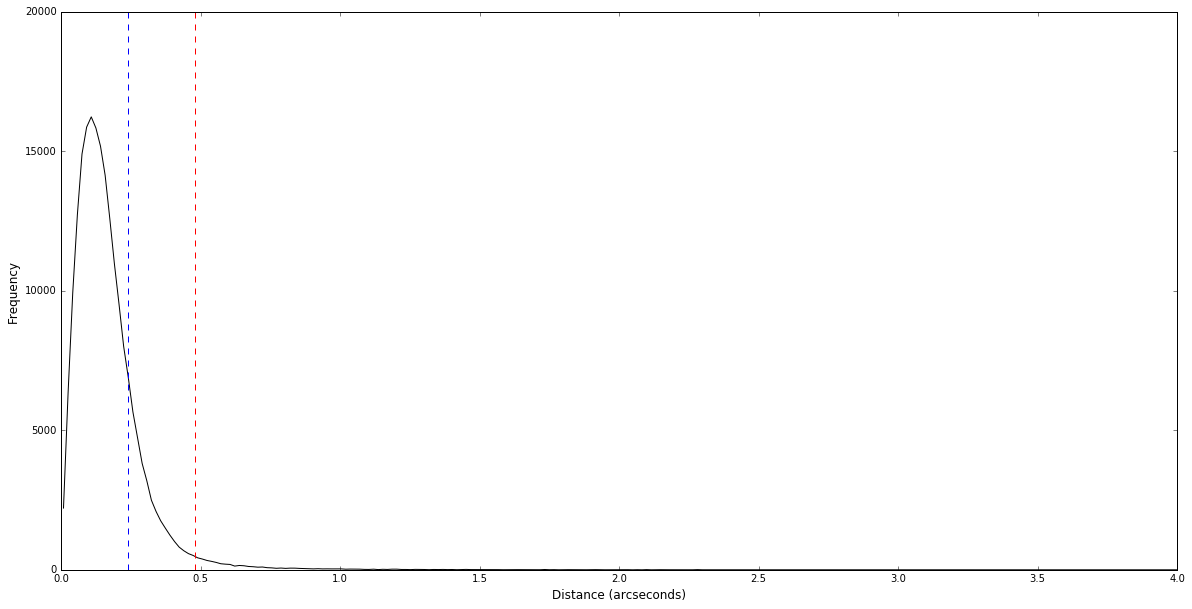

In [121]:
sdss_ukidds = make_graphs('/home/calum/Documents/Mphys_data/mgs_multiwavelength/xmatch_nearest_sdss.npy',600, w=20,h=10, x_lim=4)
plt.plot((0.24,0.24),(0,20000),'b--')
plt.plot((0.48,0.48),(0,20000),'r--')
plt.savefig('images/sdss_ukidds.png')

(205839, 7)


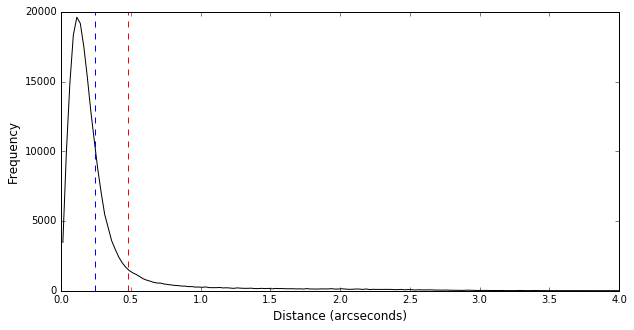

In [119]:
wise_ukidds = make_graphs('/home/calum/Documents/Mphys_data/mgs_multiwavelength/xmatch_nearest_wise.npy',600, w=10,h=5, x_lim=4)
plt.plot((0.24,0.24),(0,20000),'b--')
plt.plot((0.48,0.48),(0,20000),'r--')
plt.savefig('images/wise_ukidds.png')

(162796, 7)


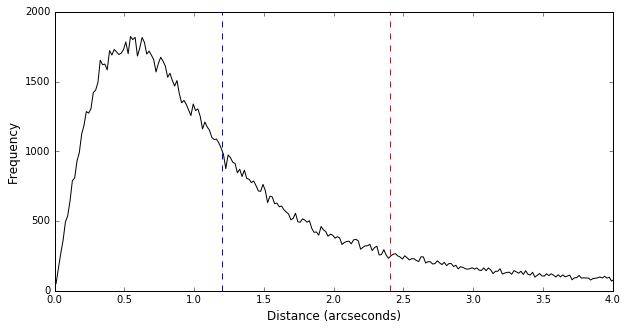

In [117]:
galex_ukidds = make_graphs('/home/calum/Documents/Mphys_data/mgs_multiwavelength/xmatch_nearest_galex.npy',600, w=10,h=5, x_lim=4)
plt.plot((1.2,1.2),(0,2000),'b--')
plt.plot((2.4,2.4),(0,2000),'r--')
plt.savefig('images/galex_ukidds.png')

(0, 4)

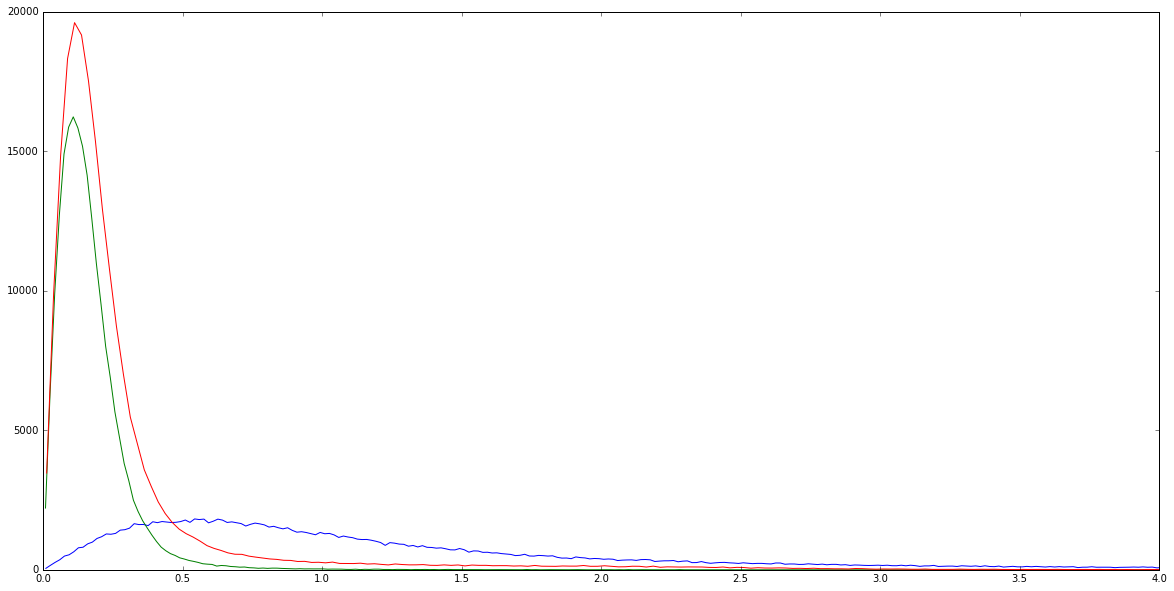

In [93]:
plt.figure(figsize=(20,10))
plt.plot(galex_ukidds[0],galex_ukidds[1])
plt.plot(sdss_ukidds[0],sdss_ukidds[1])
plt.plot(wise_ukidds[0],wise_ukidds[1])
plt.xlim(0,4)


(206189, 7)


(array([  8.65752180e-03,   2.52450760e-02,   4.18326301e-02,
          5.84201843e-02,   7.50077384e-02,   9.15952926e-02,
          1.08182847e-01,   1.24770401e-01,   1.41357955e-01,
          1.57945509e-01,   1.74533063e-01,   1.91120617e-01,
          2.07708172e-01,   2.24295726e-01,   2.40883280e-01,
          2.57470834e-01,   2.74058388e-01,   2.90645942e-01,
          3.07233497e-01,   3.23821051e-01,   3.40408605e-01,
          3.56996159e-01,   3.73583713e-01,   3.90171267e-01,
          4.06758822e-01,   4.23346376e-01,   4.39933930e-01,
          4.56521484e-01,   4.73109038e-01,   4.89696592e-01,
          5.06284146e-01,   5.22871701e-01,   5.39459255e-01,
          5.56046809e-01,   5.72634363e-01,   5.89221917e-01,
          6.05809471e-01,   6.22397026e-01,   6.38984580e-01,
          6.55572134e-01,   6.72159688e-01,   6.88747242e-01,
          7.05334796e-01,   7.21922350e-01,   7.38509905e-01,
          7.55097459e-01,   7.71685013e-01,   7.88272567e-01,
        

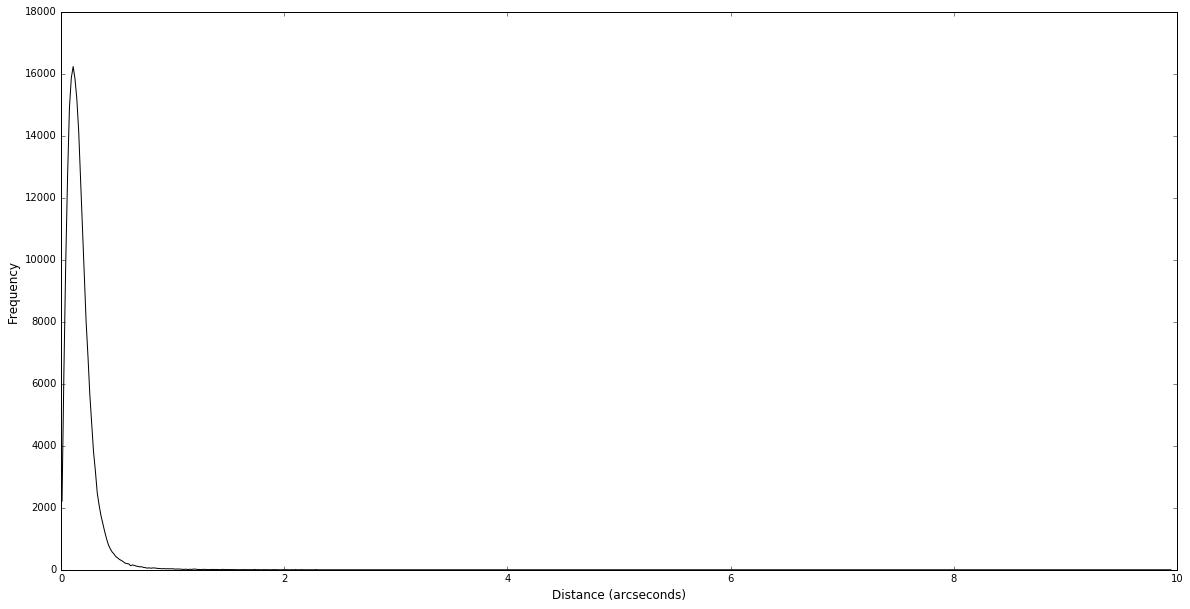

In [92]:
make_graphs('/home/calum/Documents/Mphys_data/mgs_multiwavelength/xmatch_nearest_sdss.npy',600)

(201406, 7)


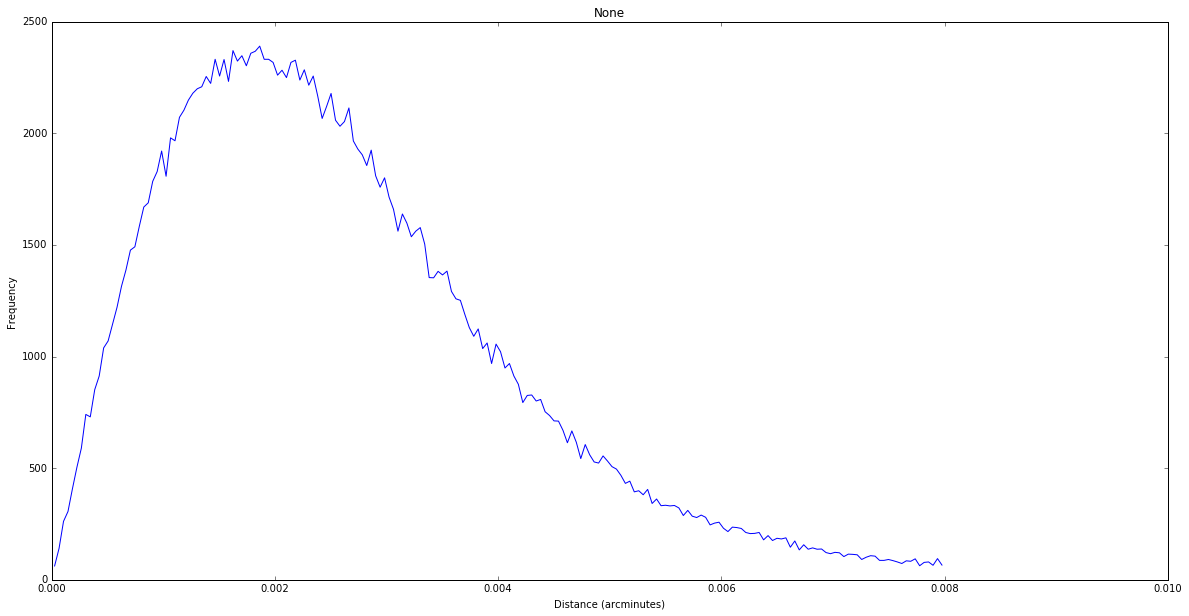

In [7]:
make_graphs('/home/calum/Documents/Mphys_data/mgs_multiwavelength/xmatch_large_sdss.npy',200, x_lim=0.01)

(167665, 7)


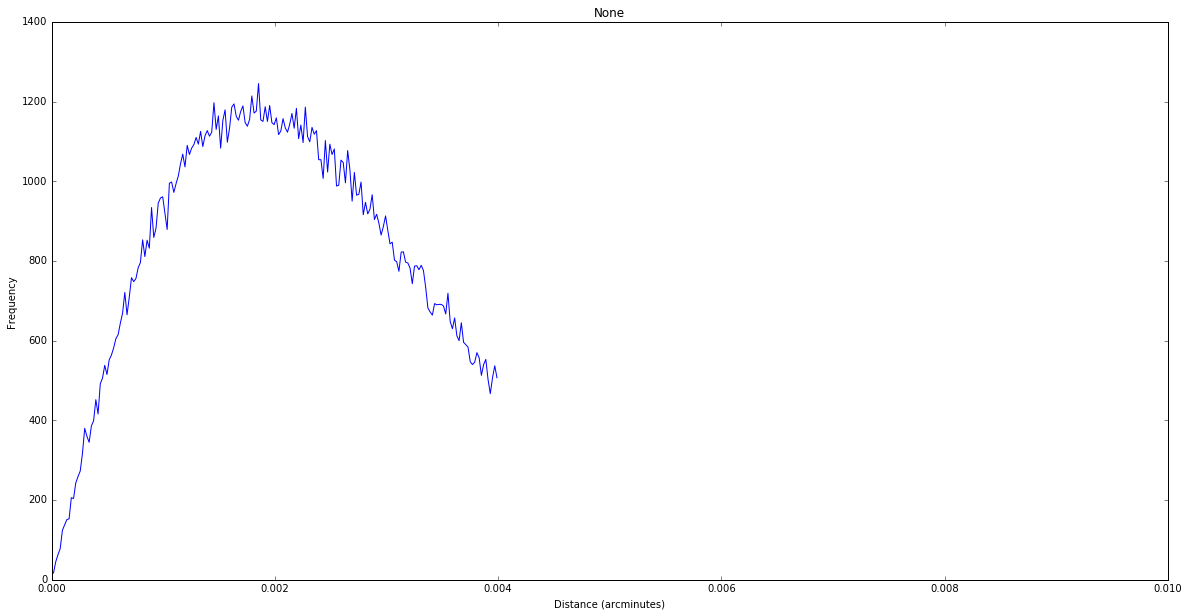

In [8]:
make_graphs('/home/calum/Documents/Mphys_data/mgs_multiwavelength/xmatch_small_sdss.npy',200, x_lim=0.01)

In [94]:
def ra_dec_graph(filename, limit = None):
    array = np.load(filename)
    # get ra and dec from las and sdss
    match_x = []
    match_y = []

    for row in array:
        del_ra = row[2]-row[4]
        del_dec = row[3]-row[5]
        match_x.append(del_dec)
        match_y.append(del_ra*math.cos(row[3]))
        
    plt.figure(figsize=(20,20))
    plt.plot(match_x,match_y,'+')
    if limit != None:
        plt.ylim(-1*limit,limit)
        plt.xlim(-1*limit,limit)
    plt.grid()
    plt.xlabel('Δdec')
    plt.ylabel('Δra*cos(dec)')
    plt.savefig('sdss_nearest_ra_dec.png')
    print(len(match_x))

590093


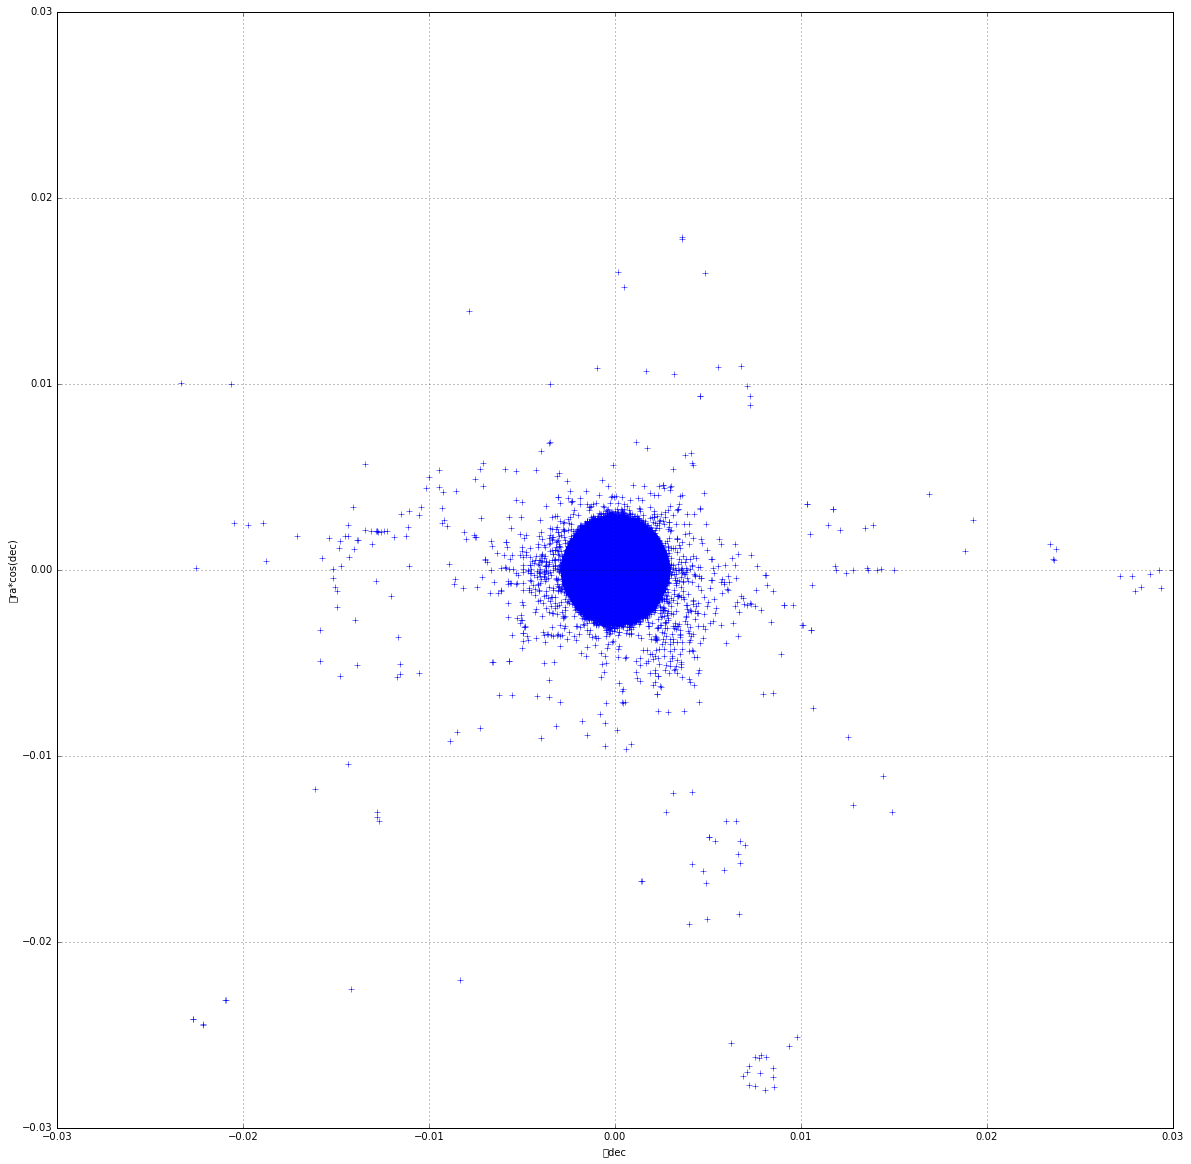

In [95]:
ra_dec_graph('/home/calum/Documents/Mphys_data/mgs_multiwavelength/xmatch_all_sdss.npy', limit=0.03)

206189


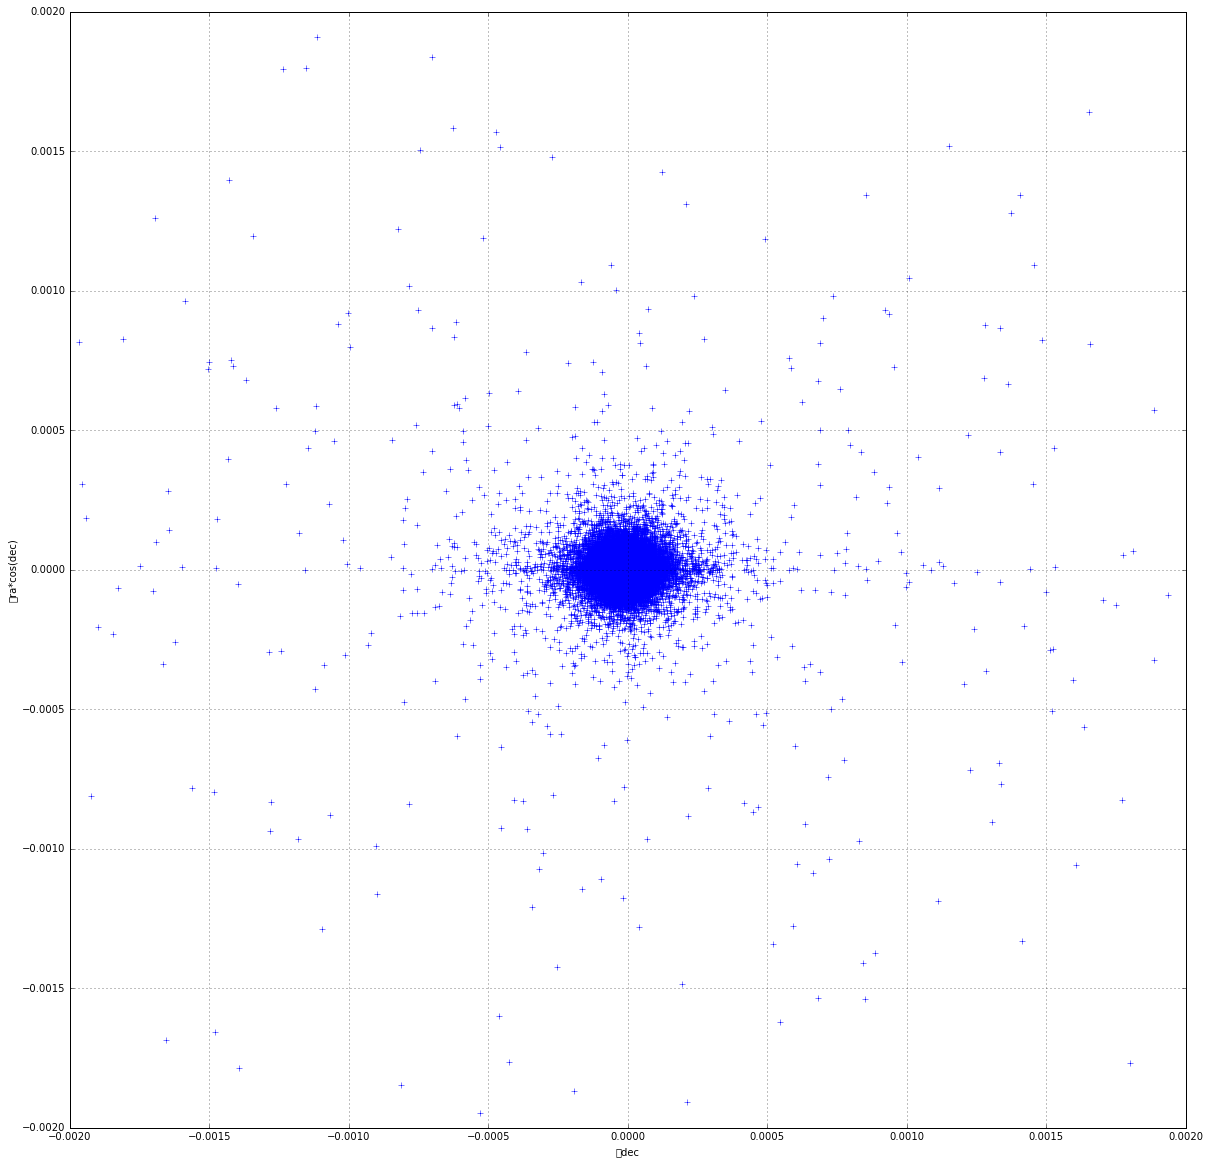

In [96]:
ra_dec_graph('/home/calum/Documents/Mphys_data/mgs_multiwavelength/xmatch_nearest_sdss.npy', limit=0.002)

201406


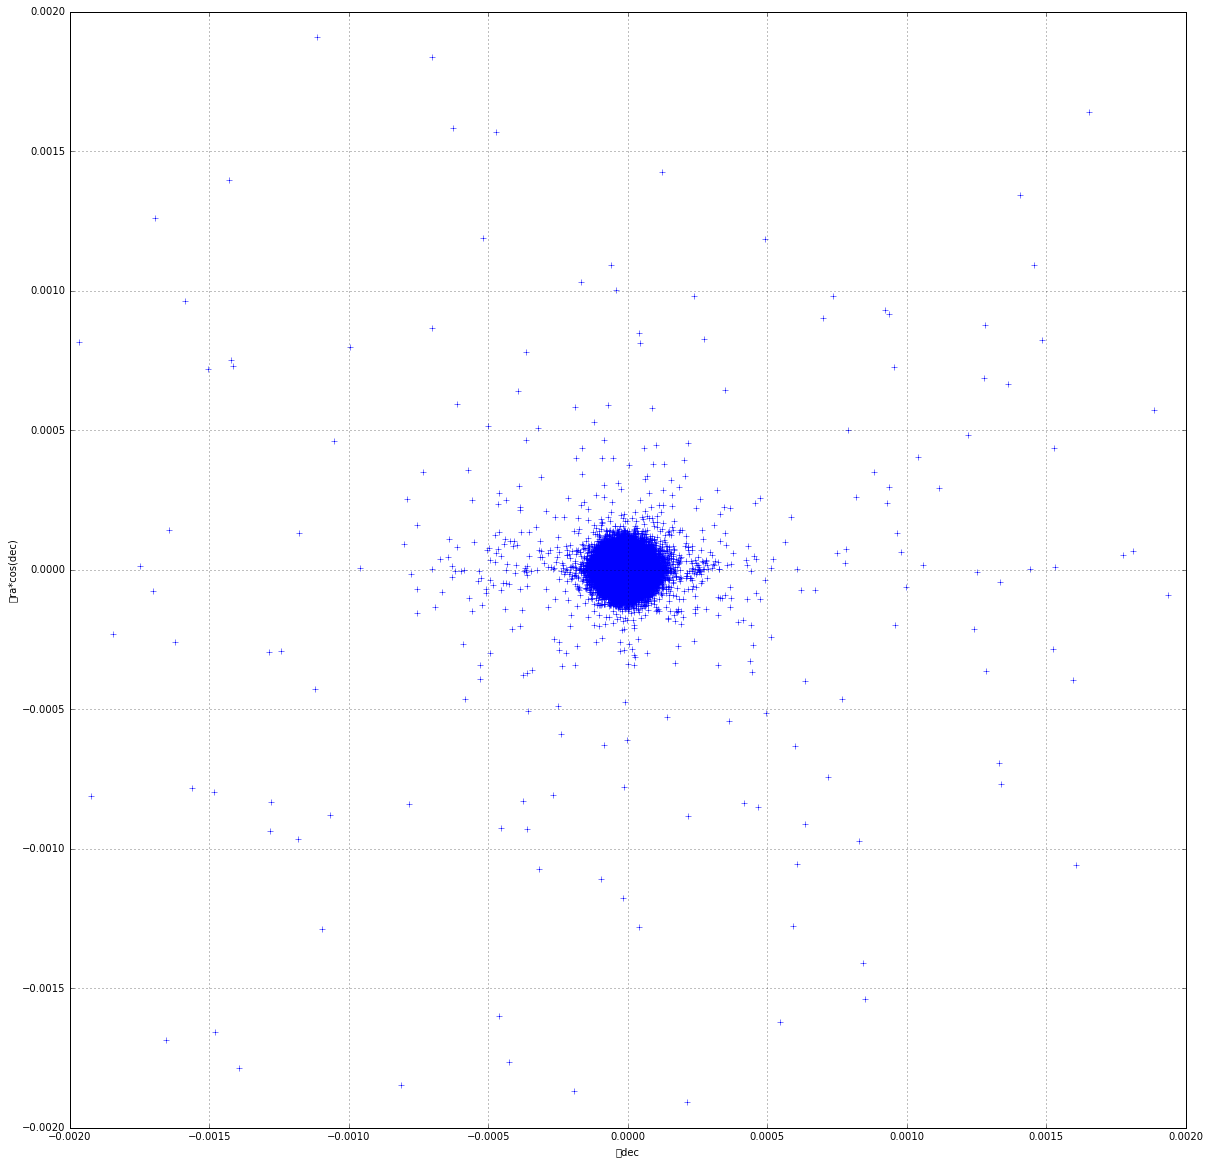

In [97]:
ra_dec_graph('/home/calum/Documents/Mphys_data/mgs_multiwavelength/xmatch_large_sdss.npy',limit=0.002)

167665


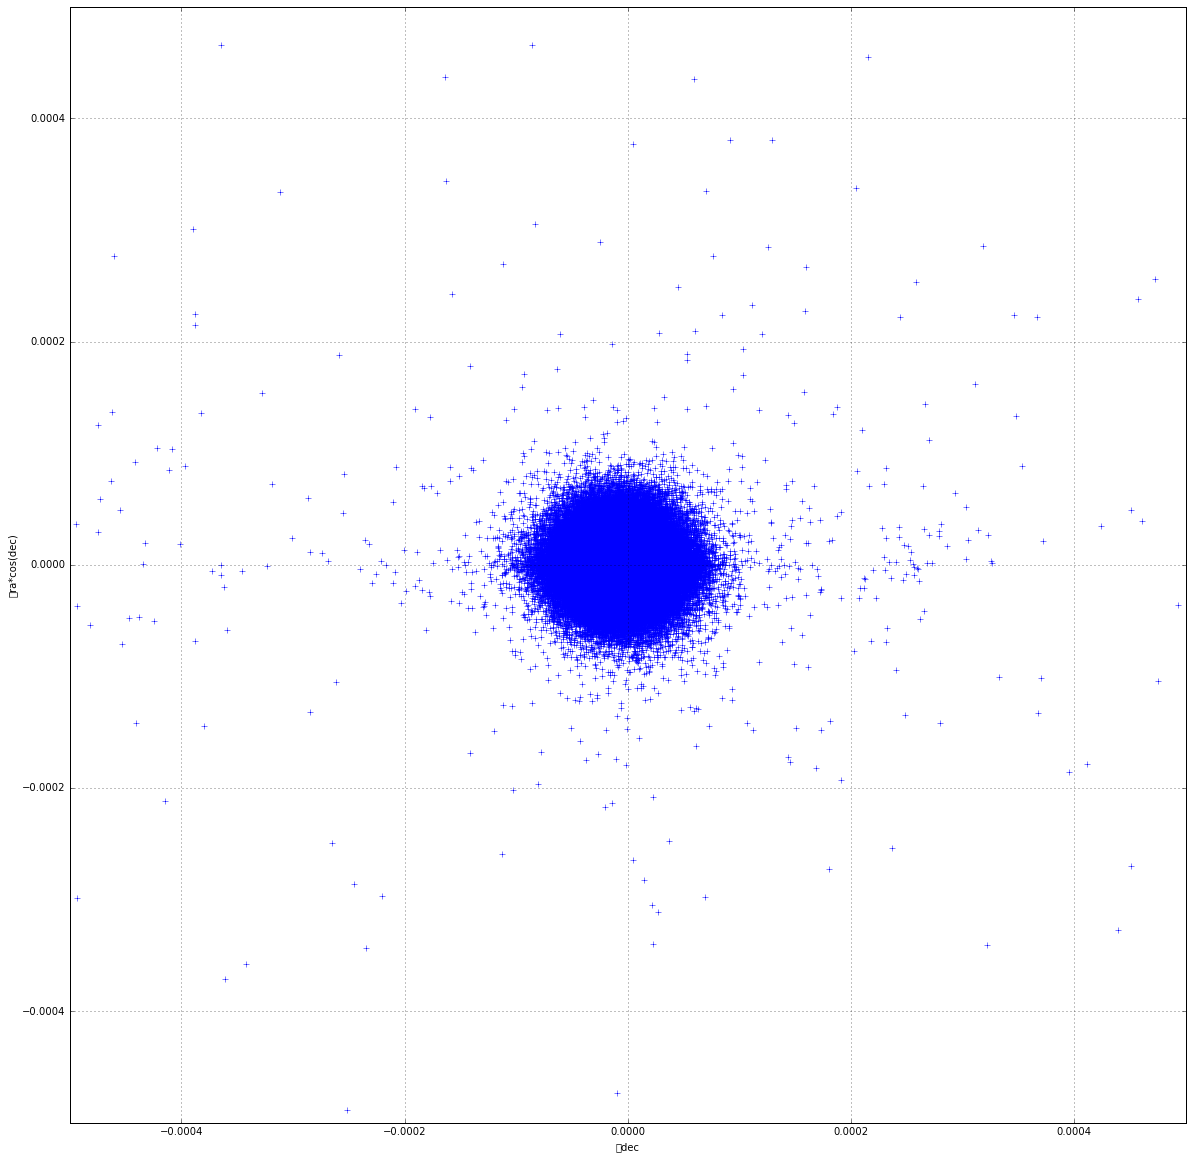

In [98]:
ra_dec_graph('/home/calum/Documents/Mphys_data/mgs_multiwavelength/xmatch_small_sdss.npy', limit=0.0005)

(162796, 7)


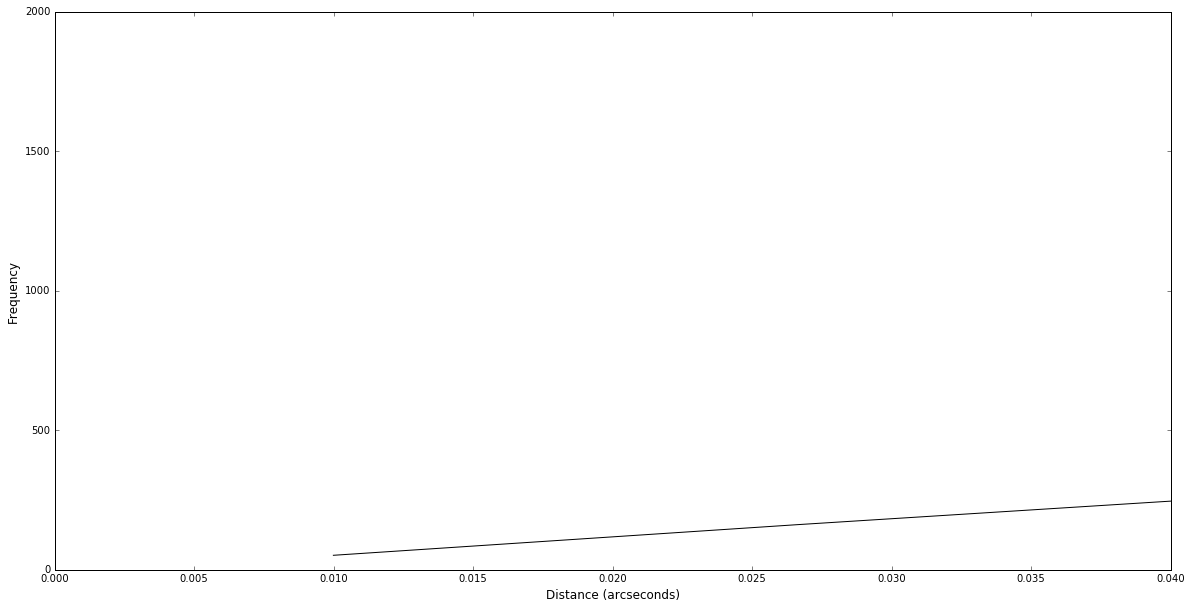

In [100]:
okay = make_graphs('/home/calum/Documents/Mphys_data/mgs_multiwavelength/xmatch_nearest_galex.npy',600, x_lim=0.04)

(205839, 7)


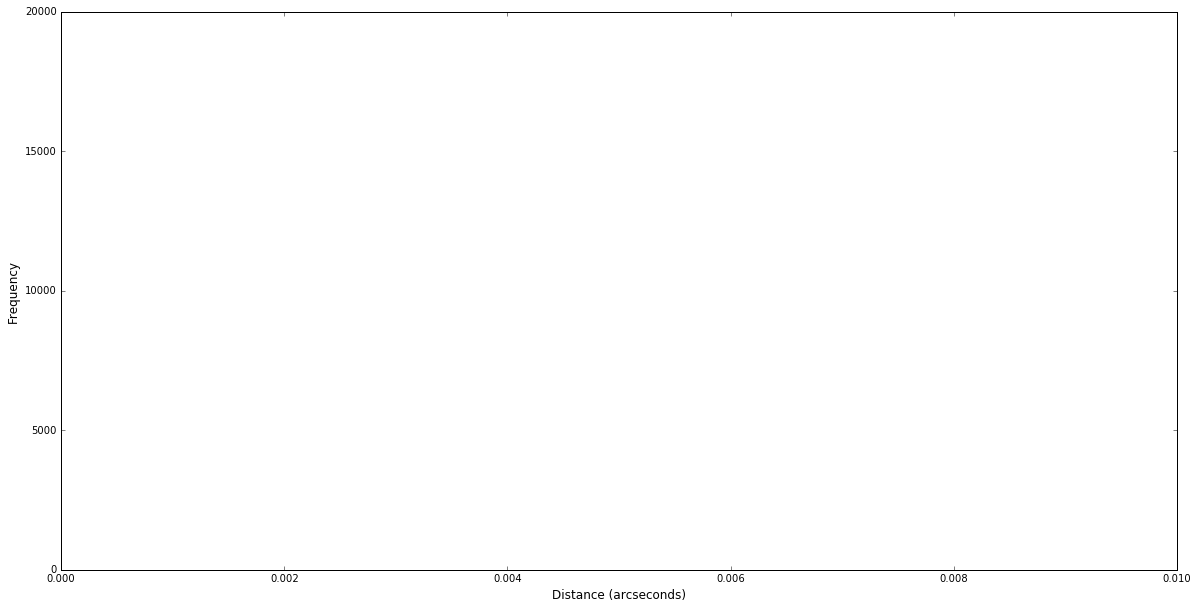

In [101]:
okay = make_graphs('/home/calum/Documents/Mphys_data/mgs_multiwavelength/xmatch_nearest_wise.npy',600, x_lim=0.01)

In [17]:
array = np.load('/home/calum/Documents/Mphys_data/mgs_multiwavelength/xmatch_nearest_wise.npy')
print(array.shape)
bins, n = plot_hist([row[1] for row in array],500)
      
step = 0.5*(bins[1]-bins[0])

x_full = bins[:-1]+step
y_full = n

(205839, 7)


In [19]:
x = x_full[:300]
y = y_full[:300]

len(x),len(y)

(300, 300)

(0, 0.02)

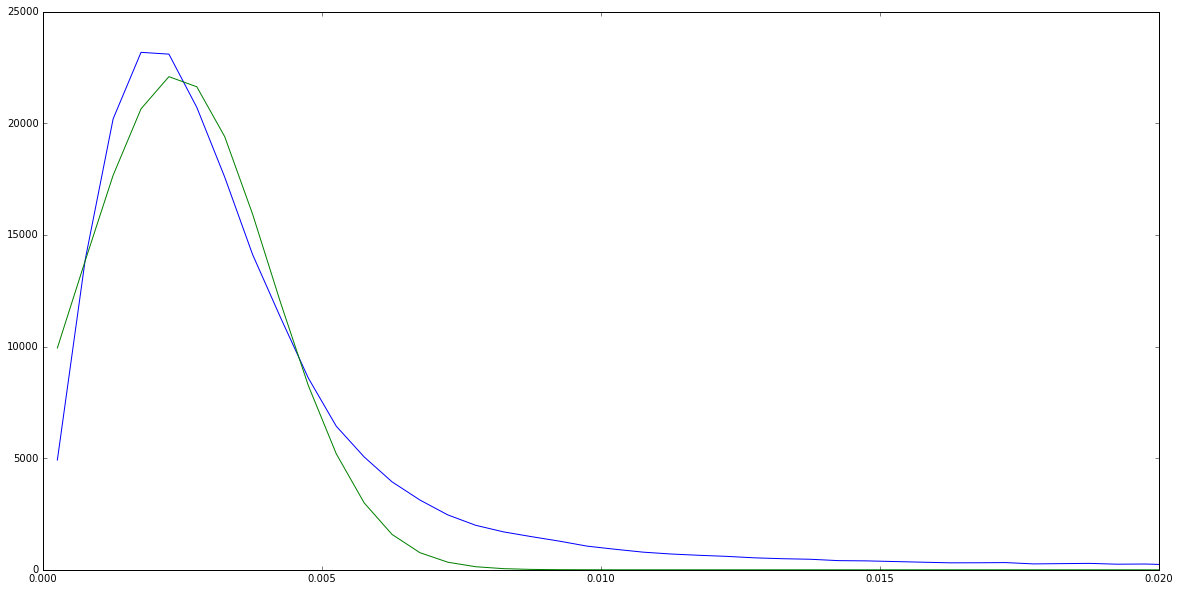

In [20]:
# Define model function to be used to fit to the data above:
def gauss(x, *p):
    A, mu, sigma = p
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))

# p0 is the initial guess for the fitting coefficients (A, mu and sigma above)
p0 = [1., 2., 1.]

coeff, var_matrix = curve_fit(gauss, x, y, p0=p0)

# Get the fitted curve
hist_fit = gauss(x_full, *coeff)

plt.figure(figsize=(20,10))
plt.plot(x_full, y_full, label='Test data')
plt.plot(x_full, hist_fit, label='Fitted data')
plt.xlim(0,0.02)

In [21]:
len(x), len(y)

(300, 300)

In [22]:
np.mean(y)

683.82000000000005

162796


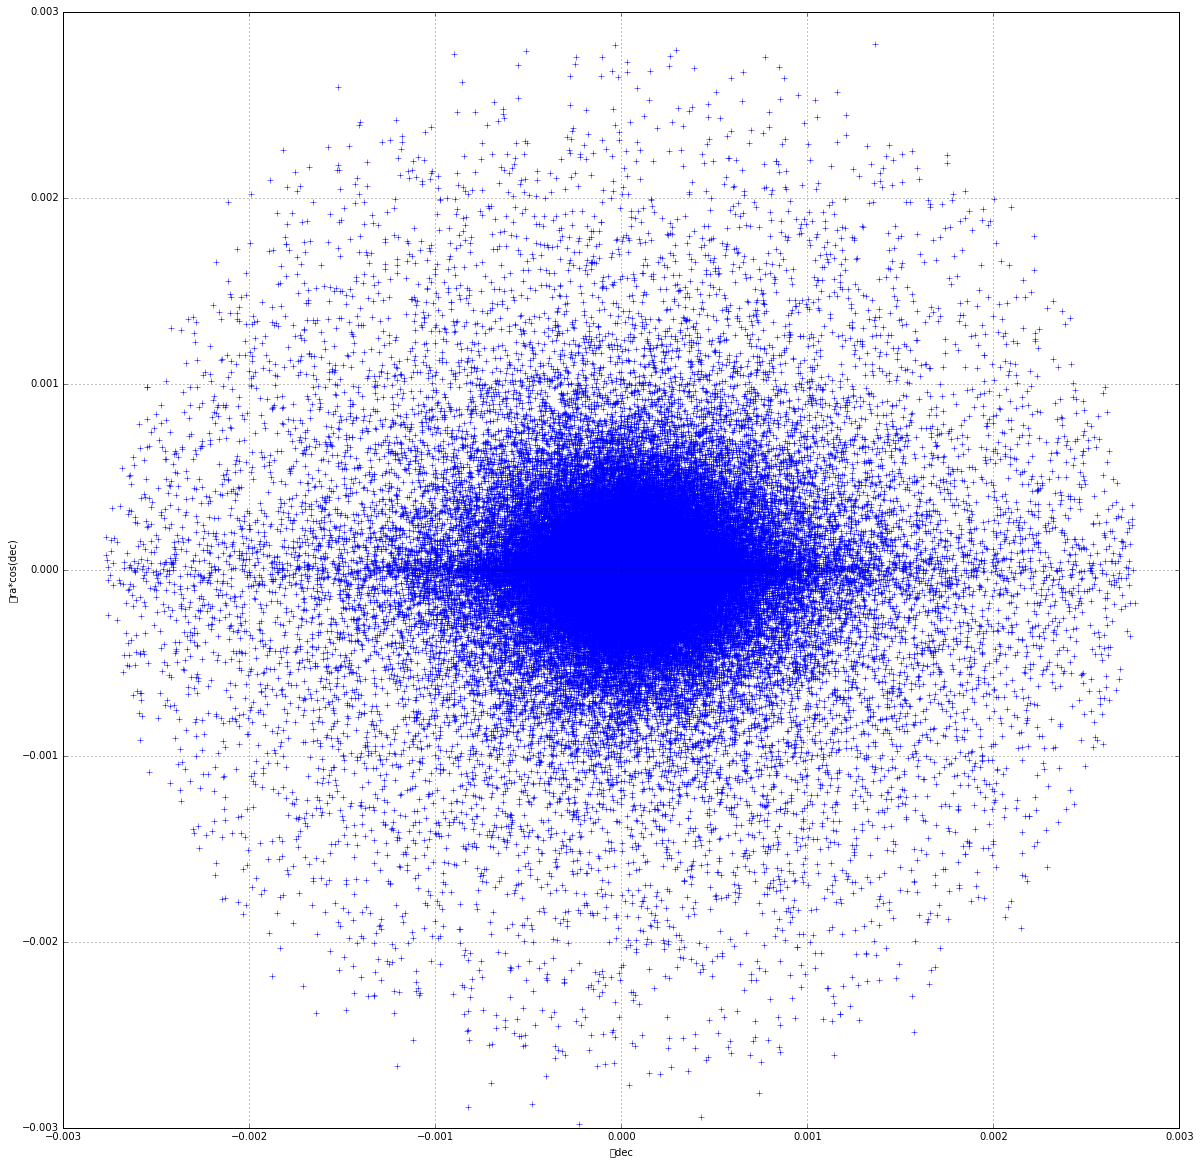

In [102]:
ra_dec_graph('/home/calum/Documents/Mphys_data/mgs_multiwavelength/xmatch_nearest_galex.npy', limit=0.003)

135232


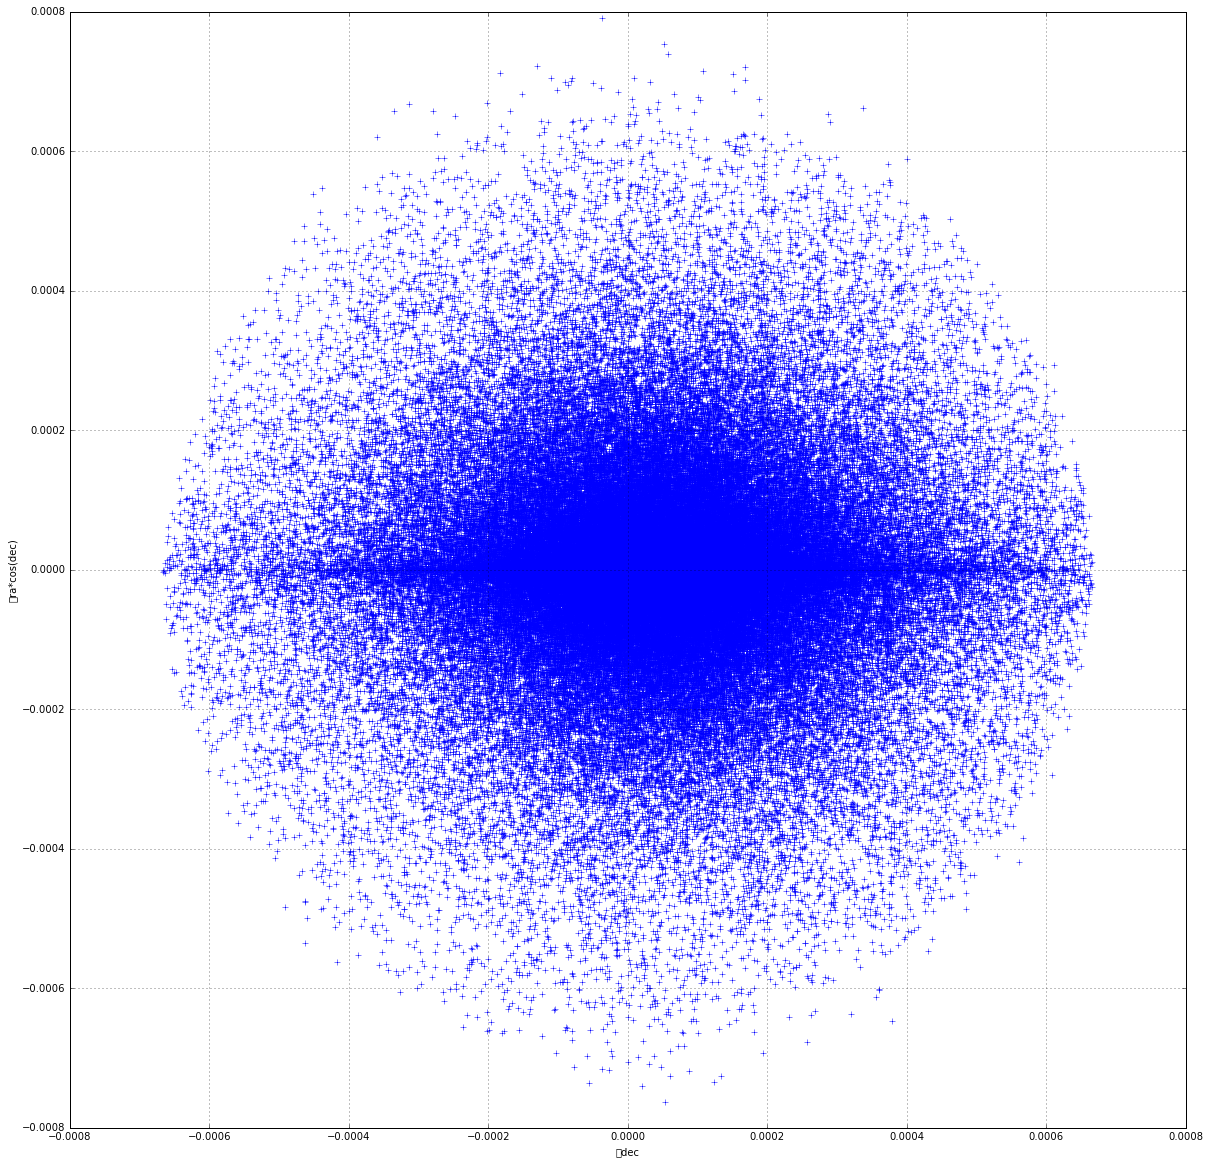

In [103]:
ra_dec_graph('/home/calum/Documents/Mphys_data/mgs_multiwavelength/xmatch_large_galex.npy')